In [53]:
%matplotlib inline

import pickle
import collections

import os, random
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

dataPath = '../PedestrianData/IntentionData'
pd.__version__

'0.24.2'

#### Loading the demographic and environmental data from pickle:

In [54]:
data = pd.read_pickle('../PedestrianData/ALLDATA.pkl')

#### Removing folder names from file values (some files are in subfolders):

In [55]:
for i in range(len(data)):
    value = data['File'].values[i].split('/')
    data['File'].values[i] = value[len(value) - 1]
    
data[['File','Wait Time (s)']].sample(5)

,File,Wait Time (s)
1699,31--2018-03-7--13-29-54.txt,19.4755
2988,24--2018-16-6--11-42-17.txt,0.34999
1068,86--2018-04-7--18-57-12.txt,37.4282
3175,23--2018-15-6--16-47-53.txt,1.06524
41,26--2018-29-6--12-16-35.txt,2.3121


### Reading three sample trials

In [90]:
while True:
    file1 = random.choice(os.listdir(dataPath))    
    file2 = random.choice(os.listdir(dataPath))    
    file3 = random.choice(os.listdir(dataPath))    
    if (data.loc[data['File'] == file1]['Wait Time (s)'].empty
        or data.loc[data['File'] == file2]['Wait Time (s)'].empty
       or data.loc[data['File'] == file3]['Wait Time (s)'].empty):
        continue
    else:
        break

crossTime1 = data.loc[data['File'] == file1]['Wait Time (s)']
crossTime2 = data.loc[data['File'] == file2]['Wait Time (s)']
crossTime3 = data.loc[data['File'] == file3]['Wait Time (s)']

width1 = data.loc[data['File'] == file1]['Lane Width']
width2 = data.loc[data['File'] == file2]['Lane Width']
width3 = data.loc[data['File'] == file3]['Lane Width']

if(data.loc[data['File'] == file1]['One way'].item() == 1):
    lane1 = 'One Way'
else:
    lane1 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane2 = 'One Way'
else:
    lane2 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane3 = 'One Way'
else:
    lane3 = "Two Way"

print(dataPath + '/' + file1)
df1 = pd.read_csv(dataPath + '/' + file1, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                       ])
df2 = pd.read_csv(dataPath + '/' + file2, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])
df3 = pd.read_csv(dataPath + '/' + file3, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])

../PedestrianData/IntentionData/86--2018-04-7--11-42-55.txt


### Visualizing gaze directions over time 

31--2018-03-5--11-55-10.txt
81--2018-04-7--19-05-05.txt
53--2018-08-5--18-25-24.txt


Text(0.5, 0.98, '3 Sample Trials and Gaze Directions')

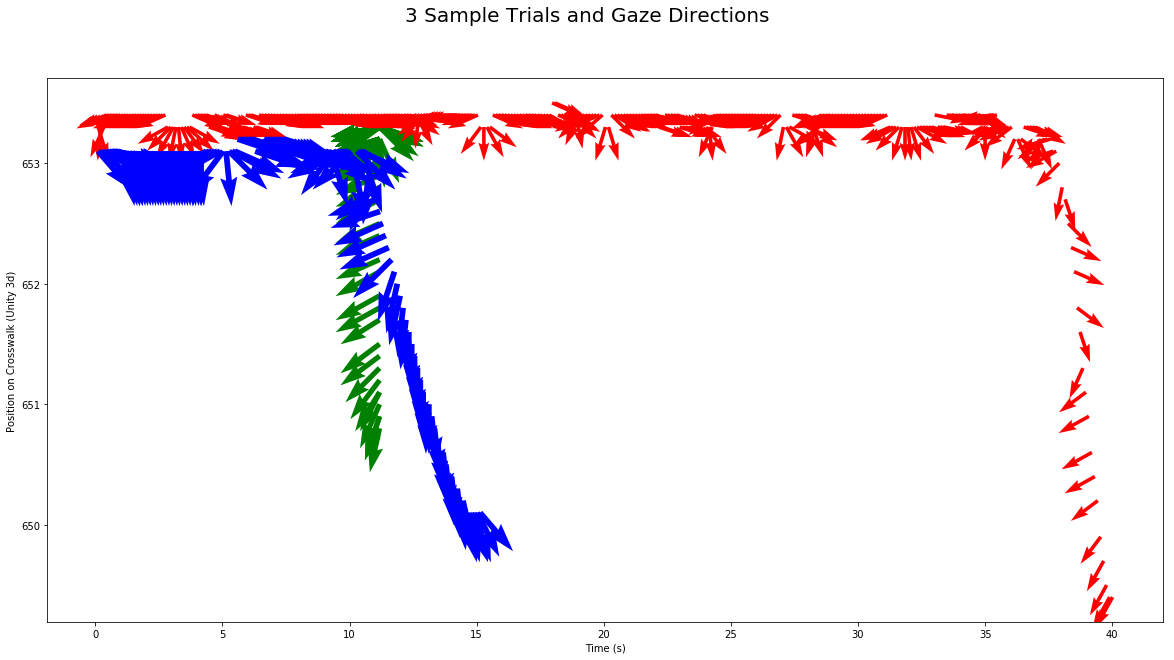

In [57]:
data_x = [crossTime1.tolist()[0], crossTime2.tolist()[0], crossTime3.tolist()[0]]
data_y = [648, 648, 648]
#plt.plot(data_x, data_y, 'or')

print(file1)
print(file2)
print(file3)
plt.figure(figsize=(20,10))
plt.quiver(df1["Time"], df1["Pos_z"], df1["Gaz_x"], df1["Gaz_z"], color='g')
plt.quiver(df2["Time"], df2["Pos_z"], df2["Gaz_x"], df2["Gaz_z"], color='r')
plt.quiver(df3["Time"], df3["Pos_z"], df3["Gaz_x"], df3["Gaz_z"], color='b')

plt.xlabel("Time (s)")
plt.ylabel("Position on Crosswalk (Unity 3d)")
plt.suptitle('3 Sample Trials and Gaze Directions', fontsize=20)

### Normalized histograms of the discretized directions for head poses and changes
#### Includes lane type and width

Green - 2.75 meter lanes - One Way
Red - 3.0 meter lanes - Two Way
Blue - 2.75 meter lanes - Two Way


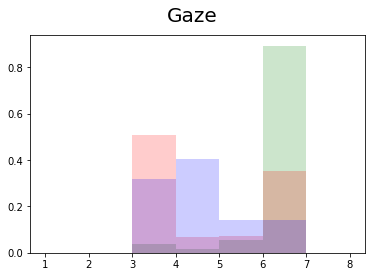

In [72]:
plt.hist(df1["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color = 'g')
plt.hist(df2["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color = 'r')
plt.hist(df3["Gaz_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color = 'b')

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Gaze", fontsize=20)
plt.show()

Green - 2.75 meter lanes - One Way
Red - 3.0 meter lanes - Two Way
Blue - 2.75 meter lanes - Two Way


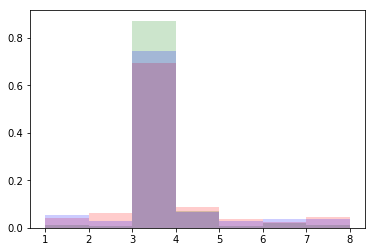

In [73]:
plt.hist(df1["Chg_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8], alpha=0.2, density=True, color = 'g')
plt.hist(df2["Chg_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color = 'r')
plt.hist(df3["Chg_Bin"], bins=[1, 2, 3, 4, 5, 6, 7, 8] , alpha=0.2, density=True, color = 'b')

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)

plt.show()

### Clustering the data

In [138]:
hist_data = np.empty((len(os.listdir(dataPath)), 3), dtype=object)
print(hist_data)

[[None None None]
 [None None None]
 [None None None]
 ...
 [None None None]
 [None None None]
 [None None None]]


In [170]:
for i in range(len(os.listdir(dataPath))):
    count = 0
    file = dataPath + "/" + files[i]
    try:
        df = pd.read_csv(file, sep=",", header=None, 
                     names=["Time", 
                            "Pos_x", "Pos_y", "Pos_z", 
                            "Gaz_x", "Gaz_y", "Gaz_z", 
                            "Vel_x", "Vel_z",
                            "Acc_x", "Acc_z",
                            "Vel_Mag", "Acc_Mag",
                            "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                            "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                           ])
        hist_data[i, 1] = np.asarray(df["Gaz_Bin"])
        hist_data[i, 2] =  np.asarray(df["Chg_Bin"])
    except FileNotFoundError:
        continue
    else:
        continue

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


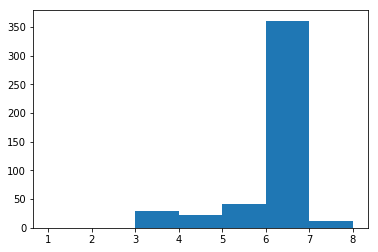

In [186]:
plt.hist(hist_data[2185,1], bins=[1, 2, 3, 4, 5, 6, 7, 8])
plt.show()